# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


In [3]:
cities

['port elizabeth',
 'taoudenni',
 'new norfolk',
 'arraial do cabo',
 'margaret river',
 'port alfred',
 'tromso',
 'feijo',
 'san patricio',
 'invercargill',
 'albany',
 'colonia',
 'madinat ash shamal',
 'punta arenas',
 'tura',
 'mount pearl',
 'tofol',
 'atafu village',
 'ilulissat',
 'waitangi',
 'fuxin',
 'ibarreta',
 'iskateley',
 'port-aux-francais',
 'forest grove',
 'papatowai',
 'blackmans bay',
 'opuwo',
 'charters towers',
 'yellowknife',
 'mahina',
 'kingston',
 'udachny',
 'camocim',
 'kargasok',
 'west island',
 'mar del plata',
 'hermanus',
 'kavieng',
 'rocha',
 'ta`u',
 'bilibino',
 'ushuaia',
 'aykhal',
 'fort bragg',
 'lebu',
 'pizarro',
 'nemuro',
 'coquimbo',
 'isafjordur',
 'kodiak',
 'grytviken',
 'utrik',
 'bargaal',
 'bologoye-4',
 'gadzhiyevo',
 'kapuskasing',
 'kill devil hills',
 'tiksi',
 'tazacorte',
 'sitka',
 'fisterra',
 'namibe',
 'puerto aysen',
 'zangguy',
 'port mathurin',
 'kavaratti',
 'anuradhapura',
 'bethel',
 'adamstown',
 'olonkinbyen',
 'p

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"

# Define an empty list to fetch the weather data for each city
city_data=[]

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city.replace(' ', '+')}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        
        # Check if the API request was successful (status code 200)
        if city_weather.status_code == 200:
            city_json = city_weather.json()

            # Print the JSON response for debugging
            print(city_json)

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_json["coord"]["lat"]
            city_lng = city_json["coord"]["lon"]
            city_max_temp = city_json["main"]["temp_max"]
            city_humidity = city_json["main"]["humidity"]
            city_clouds = city_json["clouds"]["all"]
            city_wind = city_json["wind"]["speed"]
            city_country = city_json["sys"]["country"]
            city_date = city_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
{'coord': {'lon': 25.5701, 'lat': -33.918}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 81.21, 'feels_like': 84.31, 'temp_min': 79.09, 'temp_max': 84.09, 'pressure': 1009, 'humidity': 66}, 'visibility': 10000, 'wind': {'speed': 11.5, 'deg': 80}, 'clouds': {'all': 0}, 'dt': 1706538451, 'sys': {'type': 2, 'id': 2072678, 'country': 'ZA', 'sunrise': 1706499330, 'sunset': 1706549143}, 'timezone': 7200, 'id': 964420, 'name': 'Port Elizabeth', 'cod': 200}
Processing Record 2 of Set 1 | taoudenni
{'coord': {'lon': -3.9836, 'lat': 22.6783}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 84.18, 'feels_like': 81.3, 'temp_min': 84.18, 'temp_max': 84.18, 'pressure': 1018, 'humidity': 7, 'sea_level': 1018, 'grnd_level': 1003}, 'visibility': 10

{'coord': {'lon': -52.7813, 'lat': 47.5166}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 29.25, 'feels_like': 22.24, 'temp_min': 28.72, 'temp_max': 29.95, 'pressure': 1010, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 170}, 'snow': {'1h': 0.14}, 'clouds': {'all': 100}, 'dt': 1706538626, 'sys': {'type': 2, 'id': 2004771, 'country': 'CA', 'sunrise': 1706526113, 'sunset': 1706559974}, 'timezone': -12600, 'id': 6082231, 'name': 'Mount Pearl', 'cod': 200}
Processing Record 17 of Set 1 | tofol
{'coord': {'lon': 163.0078, 'lat': 5.3248}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 81.66, 'feels_like': 85.03, 'temp_min': 81.66, 'temp_max': 81.66, 'pressure': 1011, 'humidity': 66, 'sea_level': 1011, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 9.66, 'deg': 42, 'gust': 11.45}, 'clouds': {'all': 

{'coord': {'lon': -114.3525, 'lat': 62.456}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 9.12, 'feels_like': -3.48, 'temp_min': 9.12, 'temp_max': 9.12, 'pressure': 1001, 'humidity': 85}, 'visibility': 1609, 'wind': {'speed': 9.22, 'deg': 90}, 'clouds': {'all': 100}, 'dt': 1706538582, 'sys': {'type': 1, 'id': 1007, 'country': 'CA', 'sunrise': 1706544898, 'sunset': 1706570747}, 'timezone': -25200, 'id': 6185377, 'name': 'Yellowknife', 'cod': 200}
Processing Record 31 of Set 1 | mahina
{'coord': {'lon': -149.489, 'lat': -17.5065}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 80.37, 'feels_like': 84.7, 'temp_min': 79.75, 'temp_max': 80.37, 'pressure': 1009, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 2.3, 'deg': 140}, 'clouds': {'all': 75}, 'dt': 170653

{'coord': {'lon': 111.5, 'lat': 66}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -3.37, 'feels_like': -11.45, 'temp_min': -3.37, 'temp_max': -3.37, 'pressure': 1037, 'humidity': 100, 'sea_level': 1037, 'grnd_level': 975}, 'visibility': 1110, 'wind': {'speed': 3.33, 'deg': 232, 'gust': 3.15}, 'clouds': {'all': 100}, 'dt': 1706538631, 'sys': {'country': 'RU', 'sunrise': 1706492659, 'sunset': 1706514562}, 'timezone': 32400, 'id': 2027296, 'name': 'Aykhal', 'cod': 200}
Processing Record 45 of Set 1 | fort bragg
{'coord': {'lon': -79.006, 'lat': 35.139}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 46.54, 'feels_like': 41.4, 'temp_min': 44.15, 'temp_max': 47.91, 'pressure': 1014, 'humidity': 58}, 'visibility': 10000, 'wind': {'speed': 11.01, 'deg': 360, 'gust': 20}, 'clouds': {'all': 0}, 'dt': 1706538631, 'sys': {'type': 1, 'id':

{'coord': {'lon': 128.8694, 'lat': 71.6872}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -9.04, 'feels_like': -21.64, 'temp_min': -9.04, 'temp_max': -9.04, 'pressure': 1034, 'humidity': 97, 'sea_level': 1034, 'grnd_level': 1028}, 'visibility': 5686, 'wind': {'speed': 7.02, 'deg': 251, 'gust': 11.52}, 'clouds': {'all': 99}, 'dt': 1706538577, 'sys': {'country': 'RU', 'sunrise': 1706494791, 'sunset': 1706504092}, 'timezone': 32400, 'id': 2015306, 'name': 'Tiksi', 'cod': 200}
Processing Record 9 of Set 2 | tazacorte
{'coord': {'lon': -17.9293, 'lat': 28.629}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 74.16, 'feels_like': 73.44, 'temp_min': 72.57, 'temp_max': 74.16, 'pressure': 1022, 'humidity': 46}, 'visibility': 7000, 'wind': {'speed': 4.61, 'deg': 80}, 'clouds': {'all': 14}, 'dt': 1706538634, 'sys': {'type': 2, 'id': 2002

{'coord': {'lon': -123.262, 'lat': 44.5646}, 'weather': [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 50.5, 'feels_like': 49.82, 'temp_min': 46.47, 'temp_max': 51.89, 'pressure': 1016, 'humidity': 97}, 'visibility': 402, 'wind': {'speed': 0, 'deg': 0}, 'clouds': {'all': 100}, 'dt': 1706538637, 'sys': {'type': 2, 'id': 2040223, 'country': 'US', 'sunrise': 1706542528, 'sunset': 1706577394}, 'timezone': -28800, 'id': 5720727, 'name': 'Corvallis', 'cod': 200}
Processing Record 25 of Set 2 | baiao
{'coord': {'lon': -49.6717, 'lat': -2.7906}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 84.31, 'feels_like': 91.83, 'temp_min': 84.31, 'temp_max': 84.31, 'pressure': 1014, 'humidity': 72, 'sea_level': 1014, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 4.5, 'deg': 68, 'gust': 8.7}, 'clouds': {'all': 60}, 'dt': 1706538637, 'sys': {'country': 'B

{'coord': {'lon': -24.7167, 'lat': 14.8667}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 71.74, 'feels_like': 71.38, 'temp_min': 71.74, 'temp_max': 71.74, 'pressure': 1015, 'humidity': 59, 'sea_level': 1015, 'grnd_level': 959}, 'visibility': 10000, 'wind': {'speed': 17.78, 'deg': 40, 'gust': 20.33}, 'clouds': {'all': 29}, 'dt': 1706538640, 'sys': {'country': 'CV', 'sunrise': 1706515681, 'sunset': 1706556933}, 'timezone': -3600, 'id': 3374117, 'name': 'Nova Sintra', 'cod': 200}
Processing Record 41 of Set 2 | cabo san lucas
{'coord': {'lon': -109.9124, 'lat': 22.8909}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 67.6, 'feels_like': 66.79, 'temp_min': 67.3, 'temp_max': 67.6, 'pressure': 1017, 'humidity': 58, 'sea_level': 1017, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 2.17, 'deg': 66, 'gust': 3.38}, 

{'coord': {'lon': -79.2353, 'lat': 42.097}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 31.06, 'feels_like': 23.67, 'temp_min': 29.84, 'temp_max': 33.39, 'pressure': 1017, 'humidity': 98}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 330}, 'clouds': {'all': 100}, 'dt': 1706538422, 'sys': {'type': 2, 'id': 2008828, 'country': 'US', 'sunrise': 1706531601, 'sunset': 1706567186}, 'timezone': -18000, 'id': 5122534, 'name': 'Jamestown', 'cod': 200}
Processing Record 5 of Set 3 | guangming
{'coord': {'lon': 122.7833, 'lat': 45.3333}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 3.16, 'feels_like': -6.61, 'temp_min': 3.16, 'temp_max': 3.16, 'pressure': 1035, 'humidity': 66, 'sea_level': 1035, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 4.88, 'deg': 146, 'gust': 4.74}, 'clouds': {'all': 45}, 'dt': 17065

{'coord': {'lon': 100.3354, 'lat': 5.4112}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 84.92, 'feels_like': 94.46, 'temp_min': 82.94, 'temp_max': 85.95, 'pressure': 1012, 'humidity': 75}, 'visibility': 9000, 'wind': {'speed': 5.75, 'deg': 190}, 'clouds': {'all': 20}, 'dt': 1706538645, 'sys': {'type': 1, 'id': 9429, 'country': 'MY', 'sunrise': 1706484907, 'sunset': 1706527674}, 'timezone': 28800, 'id': 1735106, 'name': 'George Town', 'cod': 200}
Processing Record 21 of Set 3 | dudinka
{'coord': {'lon': 86.1778, 'lat': 69.4058}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 4.68, 'feels_like': -7.92, 'temp_min': 4.62, 'temp_max': 4.68, 'pressure': 1033, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 18.01, 'deg': 173, 'gust': 34}, 'clouds': {'all': 100}, 'dt': 1706538646, 'sys': {'type': 2, 'id': 2087912, 'country':

{'coord': {'lon': -156.3051, 'lat': 20.9219}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 73.27, 'feels_like': 74.01, 'temp_min': 69.51, 'temp_max': 75.04, 'pressure': 1007, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 21.85, 'deg': 170, 'gust': 29.93}, 'clouds': {'all': 75}, 'dt': 1706538649, 'sys': {'type': 2, 'id': 18862, 'country': 'US', 'sunrise': 1706547775, 'sunset': 1706588009}, 'timezone': -36000, 'id': 7262697, 'name': 'Haiku-Pauwela', 'cod': 200}
Processing Record 37 of Set 3 | hawaiian paradise park
{'coord': {'lon': -154.9731, 'lat': 19.5933}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 72.03, 'feels_like': 73.31, 'temp_min': 63.91, 'temp_max': 72.03, 'pressure': 1011, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 230}, 'clouds': {'all': 0}, 'dt': 1706538649, 'sys': {'type': 2, '

{'coord': {'lon': 11.8536, 'lat': 42.0345}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 57.47, 'feels_like': 54.9, 'temp_min': 56.93, 'temp_max': 58.55, 'pressure': 1033, 'humidity': 42, 'sea_level': 1033, 'grnd_level': 1032}, 'visibility': 10000, 'wind': {'speed': 1.34, 'deg': 256, 'gust': 1.61}, 'clouds': {'all': 0}, 'dt': 1706538542, 'sys': {'type': 1, 'id': 6795, 'country': 'IT', 'sunrise': 1706509744, 'sunset': 1706545313}, 'timezone': 3600, 'id': 3167520, 'name': 'Santa Marinella', 'cod': 200}
Processing Record 2 of Set 4 | taiohae
Processing Record 3 of Set 4 | mana
{'coord': {'lon': -53.7767, 'lat': 5.6592}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 82.42, 'feels_like': 88.23, 'temp_min': 82.42, 'temp_max': 82.42, 'pressure': 1015, 'humidity': 74, 'sea_level': 1015, 'grnd_level': 1015}, 'visibility': 10000, 'wind

{'coord': {'lon': 1.4078, 'lat': 18.4411}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.45, 'feels_like': 79.93, 'temp_min': 82.45, 'temp_max': 82.45, 'pressure': 1015, 'humidity': 9, 'sea_level': 1015, 'grnd_level': 964}, 'visibility': 10000, 'wind': {'speed': 12.35, 'deg': 102, 'gust': 12.03}, 'clouds': {'all': 55}, 'dt': 1706538655, 'sys': {'country': 'ML', 'sunrise': 1706509714, 'sunset': 1706550358}, 'timezone': 0, 'id': 2455290, 'name': 'Kidal', 'cod': 200}
Processing Record 18 of Set 4 | pisco
{'coord': {'lon': -76.2167, 'lat': -13.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 78.85, 'feels_like': 78.85, 'temp_min': 78.85, 'temp_max': 80.02, 'pressure': 1013, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 230}, 'clouds': {'all': 0}, 'dt': 1706538655, 'sys': {'type': 1, 'id': 8691, 'country': '

{'coord': {'lon': 7.732, 'lat': 63.1115}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 45.25, 'feels_like': 37.45, 'temp_min': 42.85, 'temp_max': 45.25, 'pressure': 1015, 'humidity': 57}, 'visibility': 10000, 'wind': {'speed': 19.57, 'deg': 230, 'gust': 31.07}, 'clouds': {'all': 40}, 'dt': 1706538632, 'sys': {'type': 1, 'id': 1636, 'country': 'NO', 'sunrise': 1706515945, 'sunset': 1706541092}, 'timezone': 3600, 'id': 6453331, 'name': 'Kristiansund', 'cod': 200}
Processing Record 32 of Set 4 | corner brook
{'coord': {'lon': -57.9484, 'lat': 48.9667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 10.56, 'feels_like': -0.71, 'temp_min': 10.56, 'temp_max': 10.56, 'pressure': 1013, 'humidity': 89, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 806, 'wind': {'speed': 7.38, 'deg': 55, 'gust': 11.56}, 'clouds': {'all': 

{'coord': {'lon': 158.6483, 'lat': 53.0452}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 4.46, 'feels_like': -8.14, 'temp_min': 3.78, 'temp_max': 4.46, 'pressure': 1013, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 8.95, 'deg': 10}, 'clouds': {'all': 0}, 'dt': 1706538641, 'sys': {'type': 2, 'id': 2088272, 'country': 'RU', 'sunrise': 1706562835, 'sunset': 1706594575}, 'timezone': 43200, 'id': 2122104, 'name': 'Petropavlovsk-Kamchatskiy', 'cod': 200}
Processing Record 48 of Set 4 | la palma
{'coord': {'lon': -118.0467, 'lat': 33.8464}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 56.8, 'feels_like': 55.29, 'temp_min': 49.95, 'temp_max': 68.5, 'pressure': 1020, 'humidity': 66}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 60}, 'clouds': {'all': 0}, 'dt': 1706538513, 'sys': {'type': 1, 'id': 5860, 'country': 'US', 'su

{'coord': {'lon': -72.3287, 'lat': 42.1584}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 33.21, 'feels_like': 25.05, 'temp_min': 31.5, 'temp_max': 35.15, 'pressure': 1008, 'humidity': 83}, 'visibility': 8047, 'wind': {'speed': 10.36, 'deg': 10}, 'snow': {'1h': 0.25}, 'clouds': {'all': 100}, 'dt': 1706538662, 'sys': {'type': 2, 'id': 2010865, 'country': 'US', 'sunrise': 1706529953, 'sunset': 1706565518}, 'timezone': -18000, 'id': 4946620, 'name': 'Palmer', 'cod': 200}
Processing Record 13 of Set 5 | kirensk
{'coord': {'lon': 108.1119, 'lat': 57.7853}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -31.04, 'feels_like': -31.04, 'temp_min': -31.04, 'temp_max': -31.04, 'pressure': 1045, 'humidity': 100}, 'visibility': 8031, 'wind': {'speed': 1.01, 'deg': 355, 'gust':

{'coord': {'lon': -69.2181, 'lat': -51.6226}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 69.85, 'feels_like': 67.95, 'temp_min': 69.85, 'temp_max': 69.85, 'pressure': 1007, 'humidity': 30}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 280}, 'clouds': {'all': 20}, 'dt': 1706538665, 'sys': {'type': 1, 'id': 8293, 'country': 'AR', 'sunrise': 1706519193, 'sunset': 1706574785}, 'timezone': -10800, 'id': 3838859, 'name': 'Río Gallegos', 'cod': 200}
Processing Record 28 of Set 5 | yangambi
{'coord': {'lon': 24.4336, 'lat': 0.8102}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 94.96, 'feels_like': 92.41, 'temp_min': 94.96, 'temp_max': 94.96, 'pressure': 1007, 'humidity': 24, 'sea_level': 1007, 'grnd_level': 959}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 276, 'gust': 8.81}, 'clouds': {'all': 94}, 'dt': 170653866

{'coord': {'lon': -151.2583, 'lat': 60.5544}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 3.65, 'feels_like': 3.65, 'temp_min': 3.25, 'temp_max': 5.14, 'pressure': 970, 'humidity': 90}, 'visibility': 2012, 'wind': {'speed': 0, 'deg': 0}, 'snow': {'1h': 0.46}, 'clouds': {'all': 100}, 'dt': 1706538668, 'sys': {'type': 1, 'id': 7680, 'country': 'US', 'sunrise': 1706552982, 'sunset': 1706580380}, 'timezone': -32400, 'id': 5866063, 'name': 'Kenai', 'cod': 200}
Processing Record 44 of Set 5 | dzuunharaa
{'coord': {'lon': 106.4579, 'lat': 48.8523}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -15.12, 'feels_like': -15.12, 'temp_min': -15.12, 'temp_max': -15.12, 'pressure': 1039, 'humidity': 100, 'sea_level': 1039, 'grnd_level': 923}, 'visibility': 8822, 'wind': {'sp

{'coord': {'lon': -9.6149, 'lat': 16.6614}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 86.81, 'feels_like': 83.37, 'temp_min': 86.81, 'temp_max': 86.81, 'pressure': 1014, 'humidity': 8, 'sea_level': 1014, 'grnd_level': 987}, 'visibility': 10000, 'wind': {'speed': 11.56, 'deg': 72, 'gust': 11.9}, 'clouds': {'all': 11}, 'dt': 1706538670, 'sys': {'country': 'MR', 'sunrise': 1706512207, 'sunset': 1706553157}, 'timezone': 0, 'id': 2381291, 'name': 'Ayoun El Atrous', 'cod': 200}
Processing Record 10 of Set 6 | inhambane
{'coord': {'lon': 35.3833, 'lat': -23.865}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 82.15, 'feels_like': 84.83, 'temp_min': 82.15, 'temp_max': 82.15, 'pressure': 1013, 'humidity': 61, 'sea_level': 1013, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 12.41, 'deg': 137, 'gust': 12.71}, 'clouds': {'all':

{'coord': {'lon': 113.6333, 'lat': -24.8667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 73.45, 'feels_like': 74.35, 'temp_min': 73.45, 'temp_max': 73.45, 'pressure': 1011, 'humidity': 82, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 22.93, 'deg': 186, 'gust': 31.9}, 'clouds': {'all': 0}, 'dt': 1706538673, 'sys': {'country': 'AU', 'sunrise': 1706479165, 'sunset': 1706527032}, 'timezone': 28800, 'id': 2074865, 'name': 'Carnarvon', 'cod': 200}
Processing Record 25 of Set 6 | buka
{'coord': {'lon': 69.1986, 'lat': 40.8108}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 41.83, 'feels_like': 36.91, 'temp_min': 41.83, 'temp_max': 41.83, 'pressure': 1026, 'humidity': 87, 'sea_level': 1026, 'grnd_level': 984}, 'visibility': 10000, 'wind': {'speed': 7.81, 'deg': 15, 'gust': 9.31}, 'clouds': {'all': 1

{'coord': {'lon': -0.8967, 'lat': 45.5549}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 61.03, 'feels_like': 60.51, 'temp_min': 57.97, 'temp_max': 61.03, 'pressure': 1025, 'humidity': 78, 'sea_level': 1025, 'grnd_level': 1025}, 'visibility': 10000, 'wind': {'speed': 13.65, 'deg': 147, 'gust': 24.79}, 'clouds': {'all': 100}, 'dt': 1706538675, 'sys': {'type': 1, 'id': 6452, 'country': 'FR', 'sunrise': 1706513339, 'sunset': 1706547840}, 'timezone': 3600, 'id': 3026644, 'name': 'La Passe', 'cod': 200}
Processing Record 39 of Set 6 | selfoss
{'coord': {'lon': -20.9971, 'lat': 63.9331}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 37.04, 'feels_like': 25.14, 'temp_min': 37.04, 'temp_max': 37.04, 'pressure': 985, 'humidity': 96, 'sea_level': 985, 'grnd_level': 984}, 'visibility': 2712, 'wind': {'speed': 26.4, 'deg': 206, 'gust': 39

{'coord': {'lon': -74.4151, 'lat': 4.2725}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 76.57, 'feels_like': 77.07, 'temp_min': 76.57, 'temp_max': 76.57, 'pressure': 1016, 'humidity': 67, 'sea_level': 1016, 'grnd_level': 868}, 'visibility': 10000, 'wind': {'speed': 5.08, 'deg': 284, 'gust': 4.5}, 'clouds': {'all': 36}, 'dt': 1706538677, 'sys': {'country': 'CO', 'sunrise': 1706526760, 'sunset': 1706569712}, 'timezone': -18000, 'id': 3689709, 'name': 'Arbeláez', 'cod': 200}
Processing Record 4 of Set 7 | harstad
{'coord': {'lon': 16.5293, 'lat': 68.799}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 35.24, 'feels_like': 22.64, 'temp_min': 34.61, 'temp_max': 40.39, 'pressure': 985, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 48, 'deg': 264, 'gust': 62.99}, 'snow': {'1h': 0.27}, 'clouds': {'all': 100}, 'dt': 17065386

{'coord': {'lon': -67.3538, 'lat': 9.9115}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 86.97, 'feels_like': 84.83, 'temp_min': 86.97, 'temp_max': 86.97, 'pressure': 1015, 'humidity': 31, 'sea_level': 1015, 'grnd_level': 968}, 'visibility': 10000, 'wind': {'speed': 6.87, 'deg': 130, 'gust': 7.36}, 'clouds': {'all': 4}, 'dt': 1706538681, 'sys': {'country': 'VE', 'sunrise': 1706525511, 'sunset': 1706567572}, 'timezone': -14400, 'id': 3628053, 'name': 'San Juan de los Morros', 'cod': 200}
Processing Record 18 of Set 7 | mutoko
{'coord': {'lon': 32.2268, 'lat': -17.397}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 76.42, 'feels_like': 76.41, 'temp_min': 76.42, 'temp_max': 76.42, 'pressure': 1012, 'humidity': 56, 'sea_level': 1012, 'grnd_level': 874}, 'visibility': 10000, 'wind': {'speed': 5.79, 'deg': 41, 'gust': 5.5}, 'clouds': 

{'coord': {'lon': -7.5692, 'lat': 9.51}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 97.02, 'feels_like': 91.92, 'temp_min': 97.02, 'temp_max': 97.02, 'pressure': 1010, 'humidity': 9, 'sea_level': 1010, 'grnd_level': 965}, 'visibility': 10000, 'wind': {'speed': 4.14, 'deg': 29, 'gust': 3.6}, 'clouds': {'all': 25}, 'dt': 1706538684, 'sys': {'country': 'CI', 'sunrise': 1706511130, 'sunset': 1706553252}, 'timezone': 0, 'id': 2283016, 'name': 'Odienné', 'cod': 200}
Processing Record 35 of Set 7 | nelson bay
{'coord': {'lon': 152.15, 'lat': -32.7167}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 75.43, 'feels_like': 77.05, 'temp_min': 73.99, 'temp_max': 77.09, 'pressure': 1008, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 13, 'deg': 56, 'gust': 15.99}, 'clouds': {'all': 5}, 'dt': 1706538684, 'sys': {'type': 2, 'id': 2

{'coord': {'lon': 64, 'lat': 67.5}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 3, 'feels_like': -9.6, 'temp_min': 3, 'temp_max': 3, 'pressure': 1018, 'humidity': 95, 'sea_level': 1018, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 8.63, 'deg': 174, 'gust': 19.71}, 'clouds': {'all': 88}, 'dt': 1706538615, 'sys': {'country': 'RU', 'sunrise': 1706505084, 'sunset': 1706524940}, 'timezone': 10800, 'id': 1486910, 'name': 'Vorkuta', 'cod': 200}
Processing Record 49 of Set 7 | baardheere
{'coord': {'lon': 42.2764, 'lat': 2.3446}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 99.16, 'feels_like': 96.76, 'temp_min': 99.16, 'temp_max': 99.16, 'pressure': 1008, 'humidity': 21, 'sea_level': 1008, 'grnd_level': 997}, 'visibility': 10000, 'wind': {'speed': 16.42, 'deg': 107, 'gust': 17.83}, 'clouds': {'all': 100}, 'dt':

{'coord': {'lon': 58.1891, 'lat': 23.6703}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 77.09, 'feels_like': 77.74, 'temp_min': 77.09, 'temp_max': 77.09, 'pressure': 1016, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 10}, 'clouds': {'all': 0}, 'dt': 1706538688, 'sys': {'type': 1, 'id': 7560, 'country': 'OM', 'sunrise': 1706496555, 'sunset': 1706536258}, 'timezone': 14400, 'id': 288967, 'name': 'Seeb', 'cod': 200}
Processing Record 13 of Set 8 | saudarkrokur
{'coord': {'lon': -19.6394, 'lat': 65.7461}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 29.91, 'feels_like': 20.62, 'temp_min': 29.91, 'temp_max': 29.91, 'pressure': 985, 'humidity': 87, 'sea_level': 985, 'grnd_level': 983}, 'visibility': 10000, 'wind': {'speed': 11.03, 'deg': 157, 'gust': 22.97}, 'snow': {'1h': 1.33}, 'clouds': {'all': 100}, 'dt': 1706538688

{'coord': {'lon': 24.73, 'lat': 2.7858}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 97.2, 'feels_like': 94.6, 'temp_min': 97.2, 'temp_max': 97.2, 'pressure': 1006, 'humidity': 22, 'sea_level': 1006, 'grnd_level': 963}, 'visibility': 10000, 'wind': {'speed': 1.23, 'deg': 91, 'gust': 4.16}, 'clouds': {'all': 97}, 'dt': 1706538691, 'sys': {'country': 'CD', 'sunrise': 1706502847, 'sunset': 1706546029}, 'timezone': 7200, 'id': 217570, 'name': 'Buta', 'cod': 200}
Processing Record 28 of Set 8 | miandrivazo
{'coord': {'lon': 45.4667, 'lat': -19.5167}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 83.95, 'feels_like': 91.02, 'temp_min': 83.95, 'temp_max': 83.95, 'pressure': 1010, 'humidity': 72, 'sea_level': 1010, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 7.09, 'deg': 271, 'gust': 9.26}, 'rain': {'1h': 0.36}, 'cloud

{'coord': {'lon': 135.9833, 'lat': 33.7333}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 40.44, 'feels_like': 36.5, 'temp_min': 40.44, 'temp_max': 40.44, 'pressure': 1029, 'humidity': 70, 'sea_level': 1029, 'grnd_level': 1028}, 'visibility': 10000, 'wind': {'speed': 5.68, 'deg': 309, 'gust': 6.44}, 'clouds': {'all': 42}, 'dt': 1706538693, 'sys': {'country': 'JP', 'sunrise': 1706478916, 'sunset': 1706516552}, 'timezone': 32400, 'id': 1847947, 'name': 'Shingū', 'cod': 200}
Processing Record 43 of Set 8 | ciupercenii noi
{'coord': {'lon': 22.9483, 'lat': 43.9097}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 37.85, 'feels_like': 37.85, 'temp_min': 37.85, 'temp_max': 37.85, 'pressure': 1039, 'humidity': 73, 'sea_level': 1039, 'grnd_level': 1034}, 'visibility': 10000, 'wind': {'speed': 2.91, 'deg': 349, 'gust': 3.89}, 'cl

Processing Record 8 of Set 9 | sampit
{'coord': {'lon': 112.95, 'lat': -2.5333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 75.76, 'feels_like': 77.45, 'temp_min': 75.76, 'temp_max': 75.76, 'pressure': 1013, 'humidity': 94, 'sea_level': 1013, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 1.77, 'deg': 163, 'gust': 1.88}, 'clouds': {'all': 97}, 'dt': 1706538696, 'sys': {'country': 'ID', 'sunrise': 1706481253, 'sunset': 1706525272}, 'timezone': 25200, 'id': 1628884, 'name': 'Sampit', 'cod': 200}
Processing Record 9 of Set 9 | mishkino
{'coord': {'lon': 63.9175, 'lat': 55.3389}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 3.76, 'feels_like': -8.03, 'temp_min': 3.76, 'temp_max': 3.76, 'pressure': 1029, 'humidity': 98, 'sea_level': 1029, 'grnd_level': 1008}, 'visibility': 6750, 'wind': {'speed': 6.53, 'deg': 2

{'coord': {'lon': 100.3543, 'lat': -0.9492}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 82.45, 'feels_like': 91.67, 'temp_min': 82.45, 'temp_max': 82.45, 'pressure': 1015, 'humidity': 86, 'sea_level': 1015, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 3.38, 'deg': 76, 'gust': 3.87}, 'clouds': {'all': 78}, 'dt': 1706538682, 'sys': {'type': 1, 'id': 9423, 'country': 'ID', 'sunrise': 1706484401, 'sunset': 1706528170}, 'timezone': 25200, 'id': 1633419, 'name': 'Padang', 'cod': 200}
Processing Record 23 of Set 9 | rakops
{'coord': {'lon': 24.3333, 'lat': -21.0167}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 82.27, 'feels_like': 82.9, 'temp_min': 82.27, 'temp_max': 82.27, 'pressure': 1011, 'humidity': 49, 'sea_level': 1011, 'grnd_level': 911}, 'visibility': 10000, 'wind': {'speed': 7.65, 'deg': 183, 'gust': 13.71},

{'coord': {'lon': 43.2844, 'lat': -11.3847}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.56, 'feels_like': 87.28, 'temp_min': 82.56, 'temp_max': 82.56, 'pressure': 1012, 'humidity': 69, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 7.14, 'deg': 237, 'gust': 6.78}, 'clouds': {'all': 100}, 'dt': 1706538700, 'sys': {'country': 'KM', 'sunrise': 1706497264, 'sunset': 1706542705}, 'timezone': 10800, 'id': 921786, 'name': 'Mitsamiouli', 'cod': 200}
Processing Record 38 of Set 9 | kalach
{'coord': {'lon': 41.0261, 'lat': 50.4258}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 19.74, 'feels_like': 19.74, 'temp_min': 19.74, 'temp_max': 19.74, 'pressure': 1039, 'humidity': 98, 'sea_level': 1039, 'grnd_level': 1027}, 'visibility': 10000, 'wind': {'speed': 2.21, 'deg': 314, 'gust': 2.24}, 'clouds':

{'coord': {'lon': 153.2007, 'lat': -30.1106}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 76.87, 'feels_like': 78.35, 'temp_min': 76.87, 'temp_max': 77.04, 'pressure': 1011, 'humidity': 87, 'sea_level': 1011, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 6.85, 'deg': 43, 'gust': 8.16}, 'clouds': {'all': 99}, 'dt': 1706538703, 'sys': {'type': 1, 'id': 9521, 'country': 'AU', 'sunrise': 1706555571, 'sunset': 1706604455}, 'timezone': 39600, 'id': 2143003, 'name': 'Woolgoolga', 'cod': 200}
Processing Record 4 of Set 10 | murehwa
{'coord': {'lon': 31.784, 'lat': -17.6432}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 76.15, 'feels_like': 76.19, 'temp_min': 76.15, 'temp_max': 76.15, 'pressure': 1012, 'humidity': 58, 'sea_level': 1012, 'grnd_level': 868}, 'visibility': 10000, 'wind': {'speed': 5.84, 'deg': 37, 

{'coord': {'lon': 25.5195, 'lat': 29.2041}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 61.18, 'feels_like': 58.59, 'temp_min': 61.18, 'temp_max': 61.18, 'pressure': 1024, 'humidity': 34, 'sea_level': 1024, 'grnd_level': 1025}, 'visibility': 10000, 'wind': {'speed': 13.44, 'deg': 345, 'gust': 15.46}, 'clouds': {'all': 95}, 'dt': 1706538705, 'sys': {'country': 'EG', 'sunrise': 1706504931, 'sunset': 1706543566}, 'timezone': 7200, 'id': 347863, 'name': 'Sīwah', 'cod': 200}
Processing Record 18 of Set 10 | pimentel
{'coord': {'lon': -79.9342, 'lat': -6.8367}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 80.89, 'feels_like': 85.1, 'temp_min': 80.89, 'temp_max': 80.89, 'pressure': 1013, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 11.5, 'deg': 180}, 'clouds': {'all': 40}, 'dt': 1706538706, 'sys': {'type': 1, 'id

{'coord': {'lon': -175.2, 'lat': -21.1333}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 75.54, 'feels_like': 77.22, 'temp_min': 75.54, 'temp_max': 75.54, 'pressure': 1007, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 1.14, 'deg': 0}, 'clouds': {'all': 40}, 'dt': 1706538708, 'sys': {'type': 1, 'id': 7285, 'country': 'TO', 'sunrise': 1706635314, 'sunset': 1706682363}, 'timezone': 46800, 'id': 4032402, 'name': "Nuku'alofa", 'cod': 200}
Processing Record 32 of Set 10 | taro
{'coord': {'lon': 115.28, 'lat': -8.3862}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 74.86, 'feels_like': 76.51, 'temp_min': 74.86, 'temp_max': 75.2, 'pressure': 1015, 'humidity': 95, 'sea_level': 1015, 'grnd_level': 945}, 'visibility': 10000, 'wind': {'speed': 0.85, 'deg': 352, 'gust': 1.99}, 'clouds': {'all': 100}, 'dt': 1706538708, 's

{'coord': {'lon': -38.8667, 'lat': -6.7167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 97.41, 'feels_like': 96.71, 'temp_min': 97.41, 'temp_max': 97.41, 'pressure': 1012, 'humidity': 27, 'sea_level': 1012, 'grnd_level': 981}, 'visibility': 10000, 'wind': {'speed': 7.31, 'deg': 89, 'gust': 10.31}, 'clouds': {'all': 100}, 'dt': 1706538710, 'sys': {'country': 'BR', 'sunrise': 1706517364, 'sunset': 1706562043}, 'timezone': -10800, 'id': 3406088, 'name': 'Barro', 'cod': 200}
Processing Record 48 of Set 10 | dickinson
{'coord': {'lon': -95.0513, 'lat': 29.4608}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 47.07, 'feels_like': 45.03, 'temp_min': 42.85, 'temp_max': 51.75, 'pressure': 1029, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 290}, 'clouds': {'all': 0}, 'dt': 1706538710, 'sys': {'type': 2, 'id': 20

{'coord': {'lon': 39.55, 'lat': -6.4333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.76, 'feels_like': 89.82, 'temp_min': 82.76, 'temp_max': 82.76, 'pressure': 1010, 'humidity': 77, 'sea_level': 1010, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 10.4, 'deg': 48, 'gust': 11.83}, 'clouds': {'all': 96}, 'dt': 1706538713, 'sys': {'country': 'TZ', 'sunrise': 1706498563, 'sunset': 1706543199}, 'timezone': 10800, 'id': 149812, 'name': 'Sokoni', 'cod': 200}
Processing Record 14 of Set 11 | antofagasta
{'coord': {'lon': -70.4, 'lat': -23.65}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 72.68, 'feels_like': 72.75, 'temp_min': 72.68, 'temp_max': 72.68, 'pressure': 1016, 'humidity': 66, 'sea_level': 1016, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 6.33, 'deg': 245, 'gust': 4.38}, 'clouds': {'all': 

{'coord': {'lon': -112.8186, 'lat': 49.7}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 41.18, 'feels_like': 34.95, 'temp_min': 34.61, 'temp_max': 43.29, 'pressure': 1020, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 220}, 'clouds': {'all': 75}, 'dt': 1706538715, 'sys': {'type': 1, 'id': 897, 'country': 'CA', 'sunrise': 1706540911, 'sunset': 1706573998}, 'timezone': -25200, 'id': 6053154, 'name': 'Lethbridge', 'cod': 200}
Processing Record 28 of Set 11 | kulunda
{'coord': {'lon': 78.9385, 'lat': 52.566}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -2.97, 'feels_like': -15.57, 'temp_min': -2.97, 'temp_max': -2.97, 'pressure': 1032, 'humidity': 98, 'sea_level': 1032, 'grnd_level': 1013}, 'visibility': 6616, 'wind': {'speed': 7.4, 'deg': 228, 'gust': 14.14}, 'clouds': {'all': 35}, 'dt': 1706538705

{'coord': {'lon': 35.7768, 'lat': 35.5148}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 53.78, 'feels_like': 52.61, 'temp_min': 53.78, 'temp_max': 53.78, 'pressure': 1019, 'humidity': 80, 'sea_level': 1019, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 16.87, 'deg': 80, 'gust': 17.74}, 'rain': {'1h': 0.22}, 'clouds': {'all': 100}, 'dt': 1706538718, 'sys': {'type': 1, 'id': 7613, 'country': 'SY', 'sunrise': 1706503161, 'sunset': 1706540412}, 'timezone': 10800, 'id': 173576, 'name': 'Latakia', 'cod': 200}
Processing Record 44 of Set 11 | mahibadhoo
{'coord': {'lon': 72.9667, 'lat': 3.7833}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 81.39, 'feels_like': 87.33, 'temp_min': 81.39, 'temp_max': 81.39, 'pressure': 1013, 'humidity': 80, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 18.1, '

{'coord': {'lon': -120.8345, 'lat': 44.2999}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 46.69, 'feels_like': 41.81, 'temp_min': 42.04, 'temp_max': 50.11, 'pressure': 1022, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 170}, 'clouds': {'all': 0}, 'dt': 1706538721, 'sys': {'type': 2, 'id': 2089533, 'country': 'US', 'sunrise': 1706541905, 'sunset': 1706576852}, 'timezone': -28800, 'id': 5746901, 'name': 'Prineville', 'cod': 200}
Processing Record 9 of Set 12 | lazaro cardenas
{'coord': {'lon': -102.2, 'lat': 17.9583}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 77.72, 'feels_like': 78.48, 'temp_min': 77.72, 'temp_max': 77.72, 'pressure': 1015, 'humidity': 70, 'sea_level': 1015, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 2.66, 'deg': 35, 'gust': 3.4}, 'clouds': {'all': 100}, 'dt': 1706

{'coord': {'lon': -159.319, 'lat': 22.0752}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 71.91, 'feels_like': 72.84, 'temp_min': 71.47, 'temp_max': 73.72, 'pressure': 1007, 'humidity': 86}, 'visibility': 6437, 'wind': {'speed': 13.8, 'deg': 240, 'gust': 24.16}, 'rain': {'1h': 0.76}, 'clouds': {'all': 100}, 'dt': 1706538724, 'sys': {'type': 2, 'id': 2005473, 'country': 'US', 'sunrise': 1706548601, 'sunset': 1706588631}, 'timezone': -36000, 'id': 5848280, 'name': 'Kapaa', 'cod': 200}
Processing Record 24 of Set 12 | antsirabe afovoany
Processing Record 25 of Set 12 | okha
{'coord': {'lon': 142.9478, 'lat': 53.5739}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 1.76, 'feels_like': -7.49, 'temp_min': 1.76, 'temp_max': 1.76, 'pressure': 1026, 'humidity': 94, 'sea_

Processing Record 40 of Set 12 | zaragoza
{'coord': {'lon': -0.8773, 'lat': 41.6561}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 53.37, 'feels_like': 52.02, 'temp_min': 52.25, 'temp_max': 57.49, 'pressure': 1030, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 120}, 'clouds': {'all': 100}, 'dt': 1706538726, 'sys': {'type': 2, 'id': 2023117, 'country': 'ES', 'sunrise': 1706512744, 'sunset': 1706548425}, 'timezone': 3600, 'id': 3104324, 'name': 'Zaragoza', 'cod': 200}
Processing Record 41 of Set 12 | kasungu
{'coord': {'lon': 33.4833, 'lat': -13.0333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 76.1, 'feels_like': 76.8, 'temp_min': 76.1, 'temp_max': 76.1, 'pressure': 1011, 'humidity': 72, 'sea_level': 1011, 'grnd_level': 897}, 'visibility': 10000, 'wind': {'speed': 3.47, 'deg': 177, 'gust': 9.78}

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          598
Lat           598
Lng           598
Max Temp      598
Humidity      598
Cloudiness    598
Wind Speed    598
Country       598
Date          598
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port elizabeth,-33.9180,25.5701,84.09,66,0,11.50,ZA,1706538451
1,taoudenni,22.6783,-3.9836,84.18,7,0,9.10,ML,1706538623
2,new norfolk,-42.7826,147.0587,51.30,95,15,2.95,AU,1706538623
3,arraial do cabo,-22.9661,-42.0278,82.36,74,75,6.91,BR,1706538623
4,margaret river,-33.9500,115.0667,58.37,79,0,12.17,AU,1706538624


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

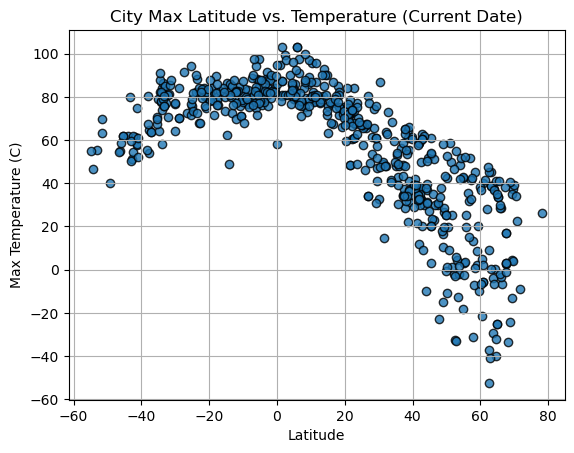

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", marker="o",alpha =0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

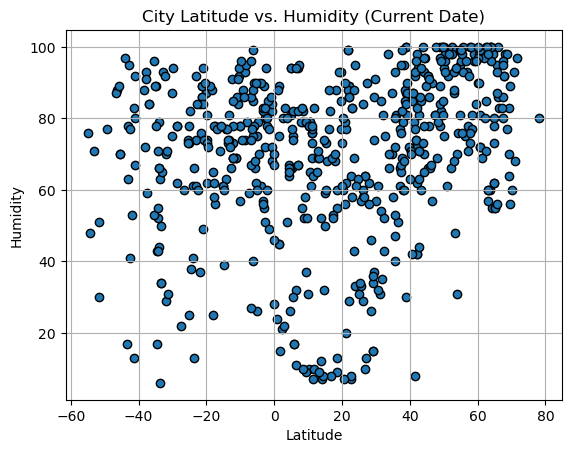

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

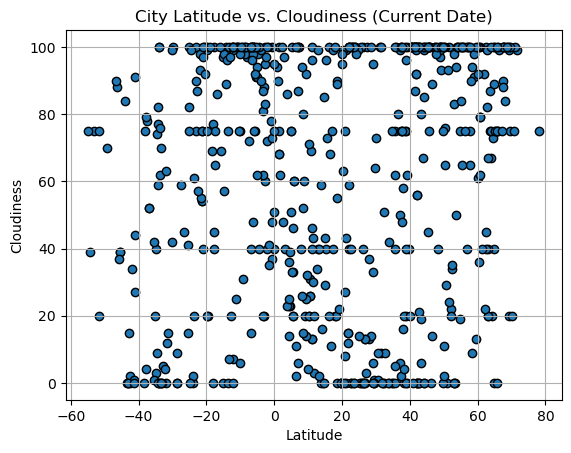

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

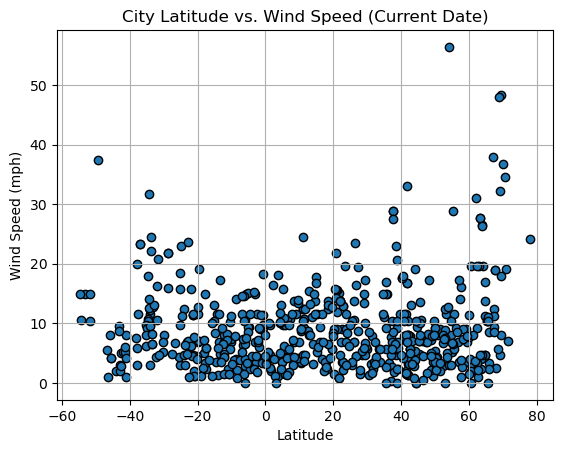

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, Yname, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    plt.scatter(x_values, y_values, marker="o")
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    plt.xlabel("Latitude")
    plt.ylabel(Yname)
    print(f"The r-Value is: {r_value}")

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,taoudenni,22.6783,-3.9836,84.18,7,0,9.10,ML,1706538623
6,tromso,69.6496,18.9570,37.42,56,75,48.34,NO,1706538624
8,san patricio,28.0170,-97.5169,53.46,62,13,1.50,US,1706538624
10,albany,42.6001,-73.9662,32.65,81,100,7.90,US,1706538428
11,colonia,50.9333,6.9500,58.42,61,0,8.05,DE,1706538513


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port elizabeth,-33.9180,25.5701,84.09,66,0,11.50,ZA,1706538451
2,new norfolk,-42.7826,147.0587,51.30,95,15,2.95,AU,1706538623
3,arraial do cabo,-22.9661,-42.0278,82.36,74,75,6.91,BR,1706538623
4,margaret river,-33.9500,115.0667,58.37,79,0,12.17,AU,1706538624
5,port alfred,-33.5906,26.8910,86.27,63,62,22.15,ZA,1706538624


###  Temperature vs. Latitude Linear Regression Plot

The r-Value is: -0.8320371473671248


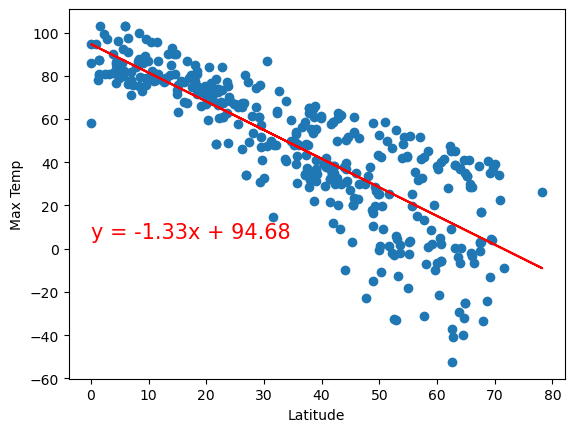

In [26]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp" ,(0, 5))

The r-Value is: 0.6279015153853097


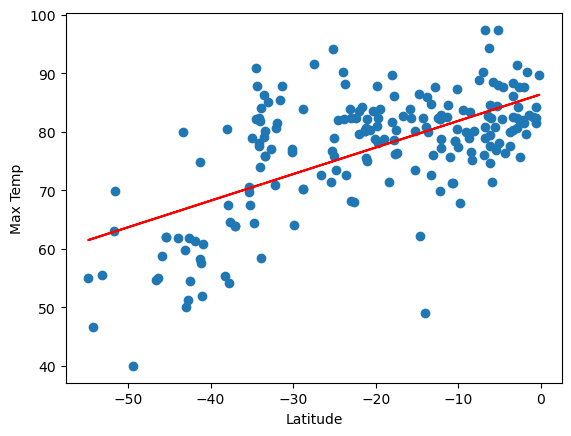

In [27]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temp", (-55, 30))

**Discussion about the linear relationship:** 

In the Northern Hemisphere, the analysis suggests an inverse relationship. This implies that with an increase in latitude values, there is an observed trend of decreasing temperatures. The opposite is the case for the Southern Hemisphere, the linear regression analysis shows a positive correlation, suggesting that temperatures tend to rise with increasing latitude values.

### Humidity vs. Latitude Linear Regression Plot

The r-Value is: 0.4305103565211738


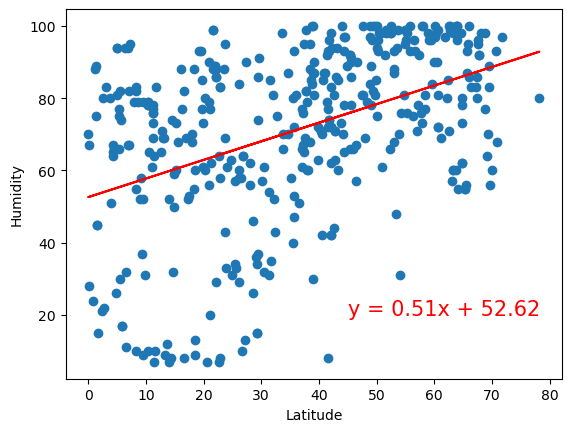

In [28]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity", (45, 20))

The r-Value is: 0.1729002360195508


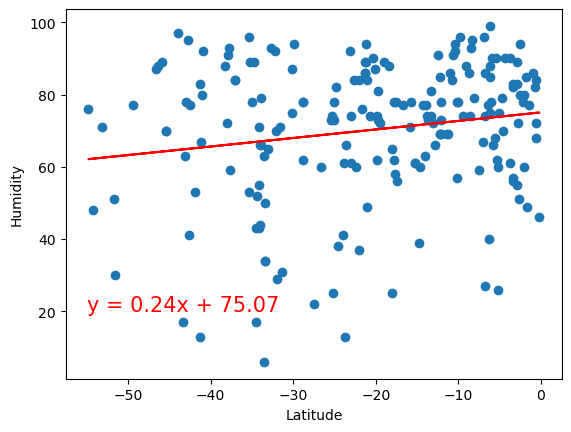

In [29]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity", (-55, 20))

**Discussion about the linear relationship:** 

In the Northern hemisphere, there is a positive correlation, suggesting that humidity tends to rise with increasing latitude values. However, in the Southern hemisphere, there is a slight positive correlation. This means that a chnage in latitude values has little to no effect on humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-Value is: 0.25541561054570117


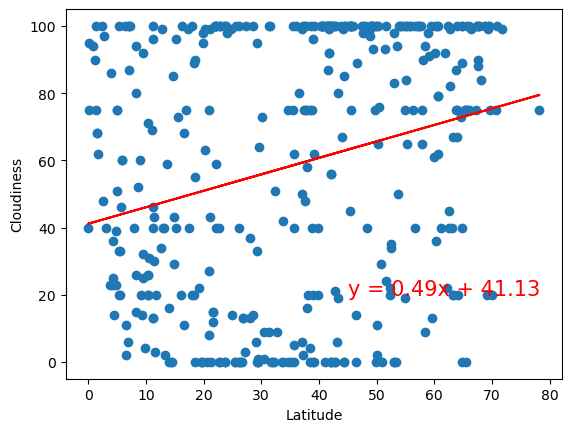

In [30]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness", (45, 20))

The r-Value is: 0.3995182757429411


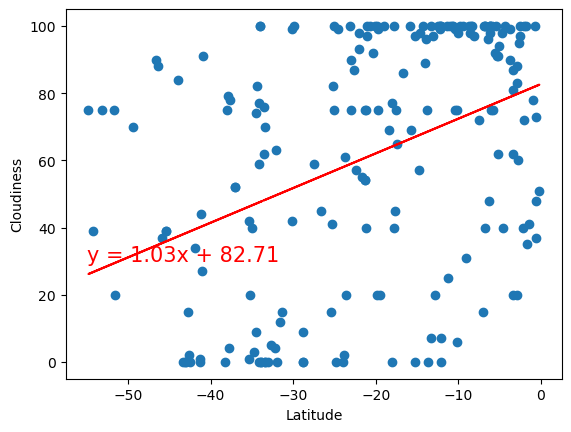

In [31]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness", (-55, 30))

**Discussion about the linear relationship:** 

In both hemispheres, there is a positive correlation. This means that as latitude values rise, cloudiness also rises.

### Wind Speed vs. Latitude Linear Regression Plot

The r-Value is: 0.1728626749973868


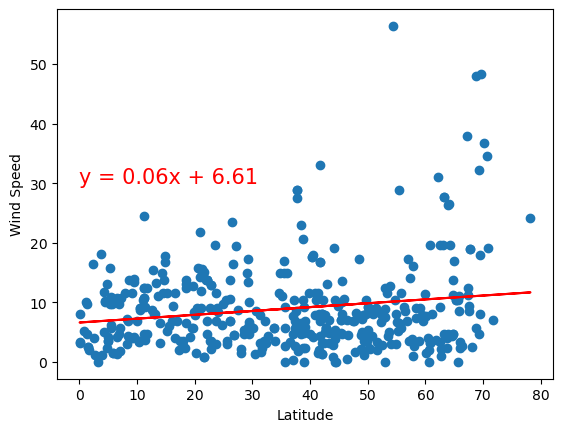

In [32]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed", (0, 30))

The r-Value is: -0.22345992940413054


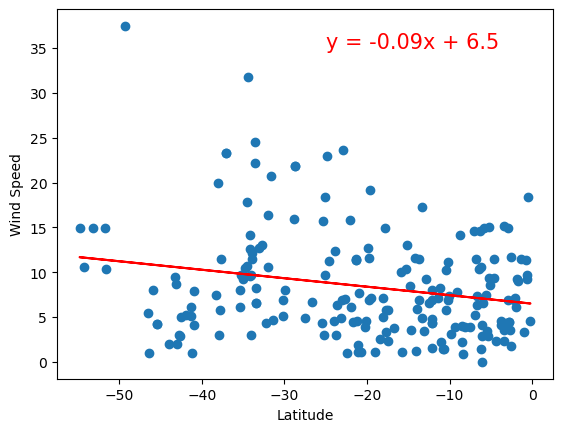

In [33]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed", (-25, 35))

**Discussion about the linear relationship:** 

The regression line in the Northern Hemisphere illustrates a slightly positive linear association, whereas the regression line in the Southern Hemisphere portrays a negative linear relationship.